In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import logging

from shnitsel.dynamic import (
    postprocess as P,
    xrhelpers as xh,
    pca_biplot as pb,
)
from shnitsel.dynamic.plot import dihedral_kde as dk

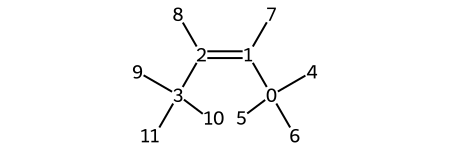

In [2]:
butene = xh.get_frames('/nc/Theo_SHNITSEL/filtered/traj_C4H8_filtered.nc')
pb.show_atom_numbers(butene.atXYZ.isel(frame=0))

So we want the dihedral angle between planes 0-1-2 and 1-2-3.

In [3]:
P.dihedral(butene.atXYZ, 0, 1, 2, 3)

<xarray.DataArray 'atXYZ' (frame: 18833)> Size: 151kB
array([0.03159385, 0.02827137, 0.02495056, ..., 2.37103771, 2.37176175,
       2.36994913])
Coordinates:
    atNames  <U1 4B 'C'
  * frame    (frame) object 151kB MultiIndex
  * trajid   (frame) int64 151kB 57 57 57 57 57 57 ... 270 270 270 270 270 270
  * time     (frame) float64 151kB 0.0 0.5 1.0 1.5 ... 148.5 149.0 149.5 150.0

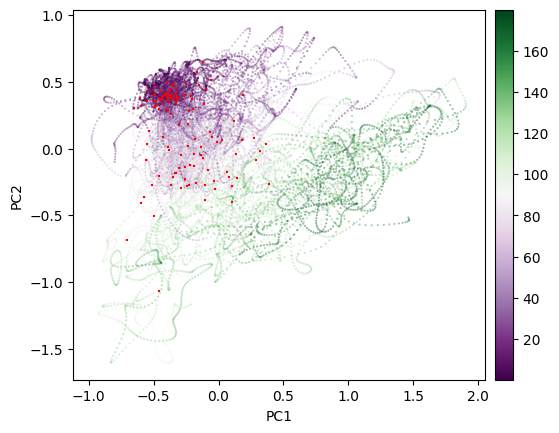

In [4]:
def figax(ax=None):
    if ax is None:
        return plt.subplots(1, 1)
    else:
        return ax.figure, ax

def plot_noodle_dihedral(noodle, hops, dihedrals, ax=None):
    return pb.plot_noodleplot(
        noodle, hops, c=dihedrals, cmap='PRGn', hops_kws=dict(c='r', marker='+', s=2), ax=ax)

def calc_and_plot(frames, i, j, k, l, ax=None):
    fig, ax = figax(ax)
    noodle, hops = P.pca_and_hops(frames)
    dihedrals = P.dihedral(frames['atXYZ'], i, j, k, l) * 180 / np.pi
    ax = plot_noodle_dihedral(noodle, hops, dihedrals, ax=ax)

calc_and_plot(butene, 0, 1, 2, 3)

In [5]:
kde_data = dk.fit_and_eval_kdes(butene, fineness=100)
kde_data

(array([[-0.97636363, -0.94727535, -0.91818706, ...,  1.84520017,
          1.87428846,  1.90337675],
        [-0.97636363, -0.94727535, -0.91818706, ...,  1.84520017,
          1.87428846,  1.90337675],
        [-0.97636363, -0.94727535, -0.91818706, ...,  1.84520017,
          1.87428846,  1.90337675],
        ...,
        [-0.97636363, -0.94727535, -0.91818706, ...,  1.84520017,
          1.87428846,  1.90337675],
        [-0.97636363, -0.94727535, -0.91818706, ...,  1.84520017,
          1.87428846,  1.90337675],
        [-0.97636363, -0.94727535, -0.91818706, ...,  1.84520017,
          1.87428846,  1.90337675]]),
 array([[-1.60402456, -1.60402456, -1.60402456, ..., -1.60402456,
         -1.60402456, -1.60402456],
        [-1.57862865, -1.57862865, -1.57862865, ..., -1.57862865,
         -1.57862865, -1.57862865],
        [-1.55323274, -1.55323274, -1.55323274, ..., -1.55323274,
         -1.55323274, -1.55323274],
        ...,
        [ 0.85937889,  0.85937889,  0.85937889, ...,  

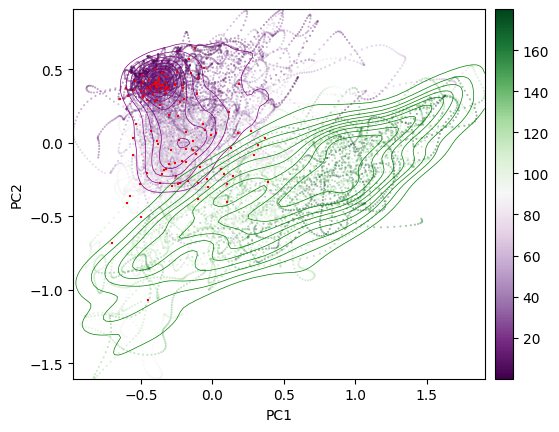

In [6]:
dk.plot_kdes(*kde_data, levels=10)
calc_and_plot(butene, 0, 1, 2, 3, ax=plt.gca())

## Recreate PCA biplot
From `2024-10-18_paper-internal_biplot.ipynb`

In [7]:
pb.pick_clusters(butene, nbins=4)

sweeping clock from -30°
swept to -110°
sweeping anti from 30°
swept to 60°


{'loadings': <xarray.DataArray (PC: 2, atomcomb: 66)> Size: 1kB
 array([[ 3.75699051e-02,  1.56365930e-01,  3.03894493e-01,
          1.50416169e-02,  7.21838030e-04,  4.30814492e-03,
          3.31684138e-03,  2.67322580e-02,  3.38660468e-01,
          1.55466525e-01,  1.73299448e-01, -8.77697132e-03,
          8.98676073e-02,  1.90883277e-02,  2.72977698e-02,
          2.02158650e-02,  3.51966052e-03, -2.32863112e-03,
          1.72104345e-01,  1.82181473e-02,  3.84219596e-02,
          3.58902422e-02,  8.11435864e-02,  1.72591997e-01,
          1.50785331e-01, -2.13915449e-02,  9.89189517e-03,
          3.76576332e-02,  2.44539359e-02,  2.56672567e-02,
          1.28858873e-01,  2.91943054e-01,  2.89599700e-01,
         -2.79603036e-02,  7.68992424e-03,  2.26604968e-02,
          2.33956621e-03,  6.57338329e-03,  3.45613549e-04,
         -7.15045444e-03, -8.85575317e-03,  1.30689225e-02,
          1.96996878e-01,  6.17345683e-02,  7.47112611e-02,
          1.91382362e-02, -1.2714698

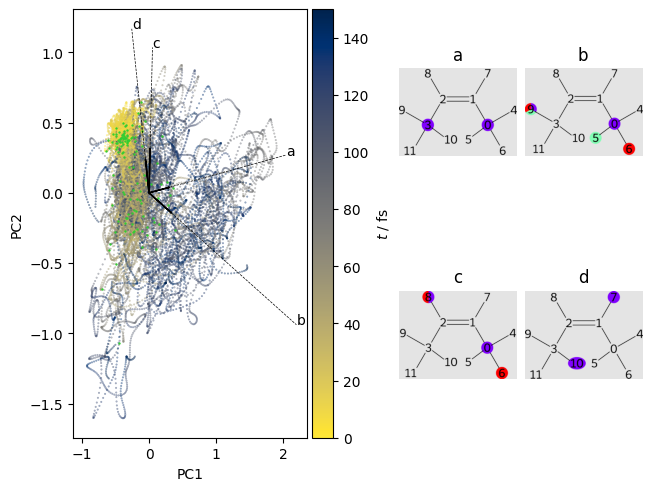

In [17]:
mol = pb.show_atom_numbers(butene['atXYZ'].isel(frame=0))
fig, axs = plt.subplot_mosaic(
  [['pca', 'pca', 'a', 'b'],
   ['pca', 'pca', 'c', 'd']],
  layout='constrained'
)

ax = pb.plot_noodleplot(*P.pca_and_hops(butene), ax=axs['pca'])

pb.plot_clusters3(
    loadings, [clusters[i] for i in picks],
    ax=axs['pca'], axs=axs, mol=mol,
    labels=list('abcdefgh')
)

## Actual innovations

sweeping clock from -30°
swept to -110°
sweeping anti from 30°
swept to 60°


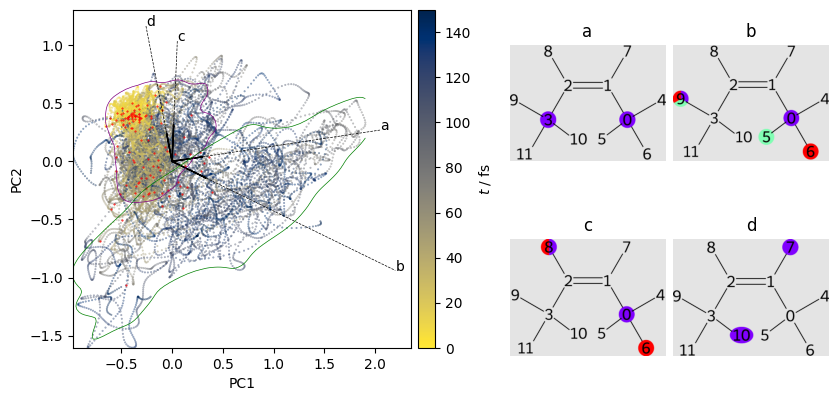

In [10]:
def biplot_dihedral_time(frames, levels=None):
    if levels is None:
        levels = [0.08]

    # prepare layout
    fig, oaxs = plt.subplots(1, 2, layout='constrained', width_ratios=[3, 2])
    fig.set_size_inches(8.27, 11.69 / 3)  # a third of a page, spanning both columns
    gs = oaxs[0].get_subplotspec().get_gridspec()
    for ax in oaxs:
        ax.remove()
    pcasf = fig.add_subfigure(gs[0])
    pcaax = pcasf.subplots(1,1)
    structsf = fig.add_subfigure(gs[1])
    structaxs = structsf.subplot_mosaic('ab\ncd')

    # prepare data
    kde_data = dk.fit_and_eval_kdes(frames, fineness=100)
    d = pb.pick_clusters(butene, nbins=4)
    loadings, clusters, picks = d['loadings'], d['clusters'], d['picks']
    mol = pb.show_atom_numbers(butene['atXYZ'].isel(frame=0))

    pb.plot_noodleplot(*P.pca_and_hops(frames), ax=pcaax, hops_kws=dict(c='r', s=0.2))
    pb.plot_clusters3(
        loadings, [clusters[i] for i in picks],
        ax=pcaax, axs=structaxs, mol=mol,
        labels=list('abcd')
    )
    dk.plot_kdes(*kde_data, levels=levels, ax=pcaax)

biplot_dihedral_time(frames=butene)